In [40]:
import sympy as sp
import matplotlib.patches as patches
from sympy.plotting.plot import List2DSeries
from IPython.display import Image, display, clear_output
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def annotate_point(_x, _y, name=None, xytext=(-10, -50)):
    if name is None:
        name = "$" + latex(_x) + "$"
    plt.annotate(name,
                 xy=(_x, _y), xycoords='data',
                 xytext=xytext, textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    
def plot_point(point, name=None, show_latex=True, ax=None, *args, **kwargs):
    point_xy = (point.x, point.y)
    if ax is None:
        ax = plt
    
    if name != None:
        name2 = name
        if show_latex:
            name2 += "$" + latex(tuple(point)) + "$"
        ax.annotate(name2,
                     xy=point_xy, xycoords='data',
                     xytext=(5, 10), textcoords='offset points', fontsize=16)
    ax.scatter(*point_xy, label=name, *args, **kwargs)

# Занятие 14
# Алгебра

### Задание 1.

Изобразить на графике эллипс с центром в точке А(1,2), полуосями 3 и 2. Вычислить эксцентриситет, площадь и длину дуги полученного эллипса. На графике отметить и подписать: 

center

hradius

vradius

periapsis

apoapsis

focus_distance

foci


In [41]:
A = sp.Point(1, 2)
ellipse = sp.Ellipse(A, 3, 2)

print("эксцентриситет:")
display(ellipse.eccentricity)

print("площадь:")
display(ellipse.area)

print("длина дуги:")
display(ellipse.circumference)

эксцентриситет:


площадь:


длина дуги:


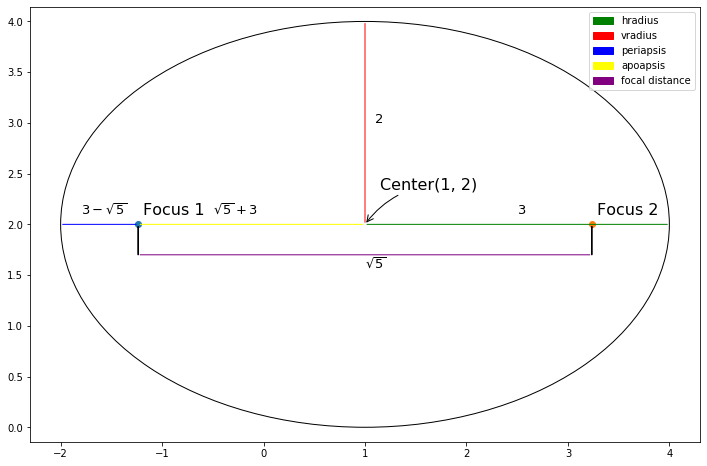

In [42]:
def biggest_segment(x, y):
    return min(x[0], y[0]), max(x[1], y[1])
    
    
def plot_ellipse_2d(ellipse, fill=False, *args, **kwargs):
    (xmin, ymin, xmax, ymax) = map(lambda x: float(x), ellipse.bounds)
    xmin -= 0.3
    ymin -= 0.3
    xmax += 0.3
    ymax += 0.3
    plt.xlim(biggest_segment((xmin, xmax), plt.xlim()))
    plt.ylim(biggest_segment((ymin, ymax), plt.ylim()))
    ellipse = patches.Ellipse(tuple(ellipse.center), ellipse.hradius * 2, ellipse.vradius * 2, fill=fill, *args, **kwargs)
    plt.gca().add_artist(ellipse)

    
def p2t(point):
    return tuple(map(float, point))
    

plt.figure(figsize = (12, 8))
plt.gca().axis('equal')
plot_ellipse_2d(ellipse)


p1 = ellipse.center + sp.Point(ellipse.hradius, 0)
p2 = ellipse.center
p3 = ellipse.center + sp.Point(0, ellipse.vradius)
p4 = ellipse.center

annotate_point(ellipse.center.x, ellipse.center.y, name = "Center(1, 2)", xytext = (15, 35))

plt.text(2.5, 2.1, "3", fontsize=13)
plt.text(1.1, 3, "2", fontsize=13)


hradius = patches.FancyArrowPatch(p2t(p1), p2t(p2), arrowstyle = "-", mutation_scale = 25, color = "green")
vradius = patches.FancyArrowPatch(p2t(p3), p2t(p4), arrowstyle = "-", mutation_scale = 25, color = "red")
apoapsis = patches.FancyArrowPatch(p2t(ellipse.foci[0]), p2t(ellipse.center), arrowstyle = "-", mutation_scale = 25, color = "yellow")
periapsis = patches.FancyArrowPatch(p2t(ellipse.foci[0]), p2t(ellipse.center - sp.Point(ellipse.hradius, 0)), arrowstyle = "-", mutation_scale = 25, color = "blue")
focal_distance = patches.FancyArrowPatch(p2t(ellipse.foci[0] - sp.Point(0, 0.3)), p2t(ellipse.foci[1] - sp.Point(0, 0.3)), arrowstyle = "-", mutation_scale = 25, color = "purple")

plt.gca().add_artist(periapsis)
plt.gca().add_artist(apoapsis)
plt.gca().add_artist(hradius)
plt.gca().add_artist(vradius)

plot_point(ellipse.foci[0], name = "Focus 1", show_latex = False)
plot_point(ellipse.foci[1], name = "Focus 2", show_latex = False)
plt.gca().add_artist(focal_distance)
plt.gca().add_artist(patches.FancyArrowPatch(p2t(ellipse.foci[0] - sp.Point(0, 0.32)), p2t(ellipse.foci[0]), color = "black"))
plt.gca().add_artist(patches.FancyArrowPatch(p2t(ellipse.foci[1] - sp.Point(0, 0.32)), p2t(ellipse.foci[1]), color = "black"))

plt.text(-1.8, 2.1, "$" + sp.latex(ellipse.periapsis) + "$", fontsize = 13)
plt.text(-0.5, 2.1, "$" + sp.latex(ellipse.apoapsis) + "$", fontsize = 13)
plt.text(1, 1.56, "$" + sp.latex(ellipse.focus_distance) + "$", fontsize = 13)

plt.legend([hradius, vradius, periapsis, apoapsis, focal_distance], ["hradius", "vradius", "periapsis", "apoapsis", "focal distance"])

### Задание 2.

Повернуть эллипс из задания 1 на 30 градусов против часовой стрелки относительно его центра.

Вывести на экран уравнение полученного эллипса в переменных u и v.

Подставить в уравнение вместо u число 2, решить полученое уравнение и подписать на графике полученные точки. 

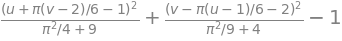

In [43]:
eq = ellipse.equation(x='u', y='v', _slope=30 * sp.pi / 180)
eq

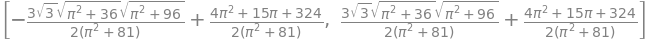

In [44]:
u, v = sorted(list(eq.free_symbols), key = str)
_v = list(sp.solveset(eq.subs(u, 2), v))
_v

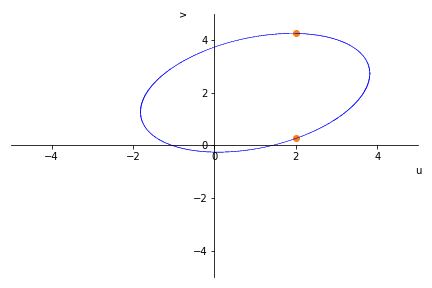

In [45]:
p1 = sp.plot_implicit(eq, show = False)
p1.show()
p1._backend.ax[0].scatter([2, 2], _v)


p1._backend.save("test.png")
clear_output()
display(Image("test.png"))
# p1.show()

###  Индивидуальное задание

Изобразить на графике свой эллипс, 

отметить точками и подписать центр и фокусы эллипса,

в легенде указать длины полуосей,

на рисунке вывести уравнение эллипса.

Повернуть эллипс так, чтобы его главная ось (на которой находятся фокусы) образовала угол $\alpha$ с положительным направлением оси ОХ.

В повернутом эллипсе отметить точками и подписать вершины эллипса,
т.е. точки пересечения эллипса с его осями.

In [46]:
O = sp.Point(7, 4)
ellipse = sp.Ellipse(O, 8, 5)

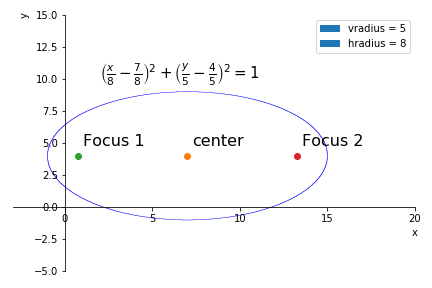

In [47]:
def _line(x, y, _clr, text, _wdth = 2.0):
    p1._backend.plt.plot(*tuple(zip(tuple(x), tuple(y))), color = _clr, linewidth = _wdth, label = text)


eq = ellipse.equation()
x, y = sorted(list(eq.free_symbols), key = str)

p1 = sp.plot_implicit(eq, (x, -3, 20), (y, -5, 15), show=False)
p1.show()


ax = p1._backend.ax[0]

legends = []
legends.append(patches.Patch(label = 'vradius = 5'))
legends.append(patches.Patch(label = 'hradius = 8'))
ax.legend(handles=legends)
ax.text(2, 10, "$" + sp.latex(sp.Eq(ellipse.equation() + 1, 1)) + "$", fontsize = 15)

plot_point(ellipse.center, name = "center", show_latex = False, ax = ax)


plot_point(ellipse.foci[0], name="Focus 1", show_latex = False, ax = ax)
plot_point(ellipse.foci[1], name="Focus 2", show_latex = False, ax = ax)


p1._backend.save("test.png")
clear_output()
display(Image("test.png"))


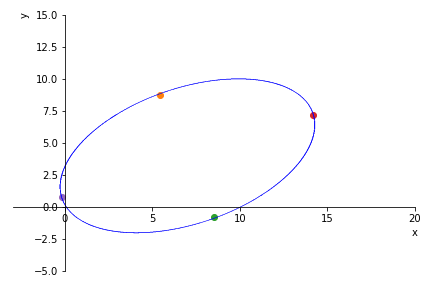

In [48]:
eq = ellipse.equation( _slope = sp.pi/5)

point1 = ellipse.center + sp.Point(0, ellipse.vradius)
point1 = point1.rotate(sp.pi / 5 * 0.5, ellipse.center)

point2 = point1 + 2 * (ellipse.center - point1)

point3 = ellipse.center + sp.Point(ellipse.hradius, 0)
point3 = point3.rotate(sp.pi / 5 * 0.68, ellipse.center)

point4 = point3 + 2 * (ellipse.center - point3)

x, y = sorted(list(eq.free_symbols), key = str)

p1 = sp.plot_implicit(eq, (x, -3, 20), (y, -5, 15), show = False)
p1.show()


ax = p1._backend.ax[0]

plot_point(point1, ax = ax)
plot_point(point2, ax = ax)
plot_point(point3 - sp.Point(0.1, 0.1), ax = ax)
plot_point(point4 + sp.Point(0.1, 0.1), ax = ax)

p1._backend.save("test.png")
clear_output()
display(Image("test.png"))
